<a href="https://colab.research.google.com/github/nxthuan512/Reinforcement-Learning-An-Introduction/blob/master/Multi_armed_Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This notebook shows the codes of the action-value methods described in the **Reinforcement Learning - An Introduction** *(Sutton and Barton March 2018)* textbook. The following codes are adjusted based on the **Artificial Intelligence: Reinforcement Learning in Python** course *(Lazy Programmer)*. 


---


**References**:
1.   [Reinforcement Learning - An Introduction](https://github.com/t0nberryking/Reinforcement-Learning) textbook
2.   [Artificial Intelligence: Reinforcement Learning in Python](https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python) course

#A Multi-armed Bandit Problem
Consider the following learning problem. You are faced repeatedly with a choice among *k* different options, or actions. After each choice you receive a numerical reward chosen from a stationary probability distribution that depends on the action you selected. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or *time steps*. (**Ref. 1**, Chapter 2.1, pp. 45/548)

# Action-Value Methods

In [0]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

## 1. Epsilon-Greedy
**Ref. 1**, Chapter 2.4, pp. 51/548 \\
**Ref. 2**, Section 2.7

run_epsGreedy: average award
1.0162629527417555
1.99647361077969
2.9968099817818987
run_epsGreedy: average award
0.9877972763370072
2.064989334544288
2.9979424592068447
run_epsGreedy: average award
1.081492639474837
2.059279564753753
2.9979810800853146


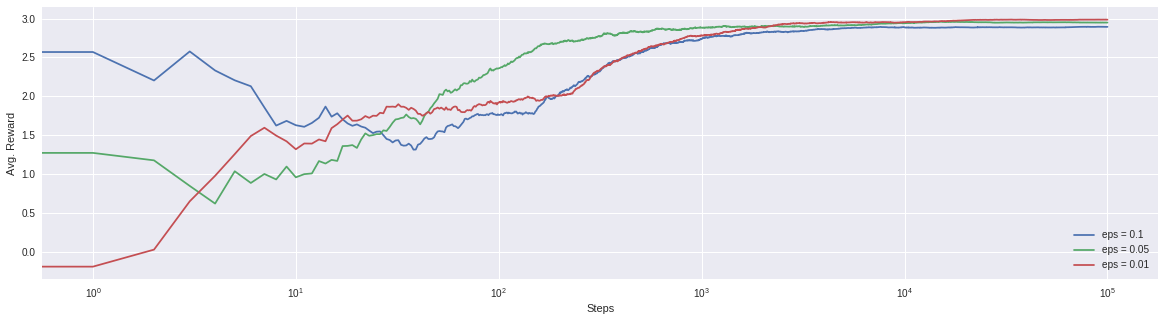

In [4]:
# =====================================================
# Class Bandit
# =====================================================
class BanditEpsGreedy:
    def __init__(self, m):
        self.m = m
        self.mean = 0   # 
        self.N = 0      # Number of experiments
    
    # Generate random value whenever pulling    
    def pull(self):
        return np.random.randn() + self.m
    
    # Update the mean
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + (1.0/self.N)*x
        
        
# =====================================================
# Run experiment
#    N: Number of experiments
# =====================================================
def run_epsGreedy (m1, m2, m3, eps, N):
    bandits = [BanditEpsGreedy(m1), BanditEpsGreedy(m2), BanditEpsGreedy(m3)]
    
    reward = np.empty(N)
    
    for i in range (N):
        # Agency selects action based on epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        
        # Environment generates state
        x = bandits[j].pull()
        
        #
        bandits[j].update(x)
        
        # Agency obtains the reward
        reward[i] = x
    
    # Accumulate average reward
    cumm_reward = np.cumsum(reward) / (np.arange(N) + 1)

    print('run_epsGreedy: average award')
    for b in bandits:
        print(b.mean)

    return cumm_reward

  
# =====================================================
# Main function
# =====================================================
if __name__ == '__main__':
    epsGreedy_1 = run_epsGreedy(1.0, 2.0, 3.0, 0.1, 100000)
    epsGreedy_05 = run_epsGreedy(1.0, 2.0, 3.0, 0.05, 100000)
    epsGreedy_01 = run_epsGreedy(1.0, 2.0, 3.0, 0.01, 100000)
    
    # log scale plot
    plt.figure(figsize=(20, 5))
    plt.xlabel('Steps')
    plt.ylabel('Avg. Reward')
    
    plt.plot(epsGreedy_1, label='eps = 0.1')
    plt.plot(epsGreedy_05, label='eps = 0.05')
    plt.plot(epsGreedy_01, label='eps = 0.01')
    
    plt.legend()
    plt.xscale('log')
    plt.show()